# **FINAL PROJECT**

In this project, I will investigate the dynamics of risk underwriting in health insurance using the dataset titled "Health_Insurance_Premium_Charges_Prediction_11". This dataset contains details about 1338 individuals with insurance coverage. Here's how I'll proceed with the proposed task:

## **1.Exploratory Data Analysis (EDA):**

I'll begin by exploring the dataset and understanding the characteristics of the input features, including age, sex, BMI, number of children, smoker status, and region. Visualizing the distributions of these features will provide insights into their individual impacts.

## **2.Feature Effects on Insurance Charges:**

Next, I'll visualize how these input features affect the final output feature, insurance charges. Understanding the relationships between the input features and insurance charges will help identify which factors contribute most significantly to the charges.

## **3.Model Fitting and Evaluation with PCA:**

After preprocessing the data, I'll apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. I'll determine the optimal number of principal components and then fit regression models, including Linear Regression, Ridge Regression, Decision Tree, and Random Forest, using the reduced feature set.
I'll evaluate the performance of each model using metrics such as Mean Squared Error, R^2 Score, Mean Absolute Error, and Explained Variance Score.

## **4.Model Performance Visualization:**

Finally, I'll visualize the performance of each model, including the PCA-transformed models, to gain insights into their predictive capabilities. This will include scatter plots comparing actual vs. predicted charges and possibly decision tree visualizations for the tree-based models.



---



---



# **PART-1**

---
# **Understanding the distribution of individual columns**



**Importing the necessary libraries**

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.decomposition import PCA

In [76]:
warnings.filterwarnings("ignore", category=FutureWarning)


In [77]:
df = pd.read_csv("Health_Insurance_Premium_Charges_Prediction_11.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


First of all, we will try to understand the distribution of data for individual columns

## **AGE**

---



Let us first try to understand the distribution of the age column

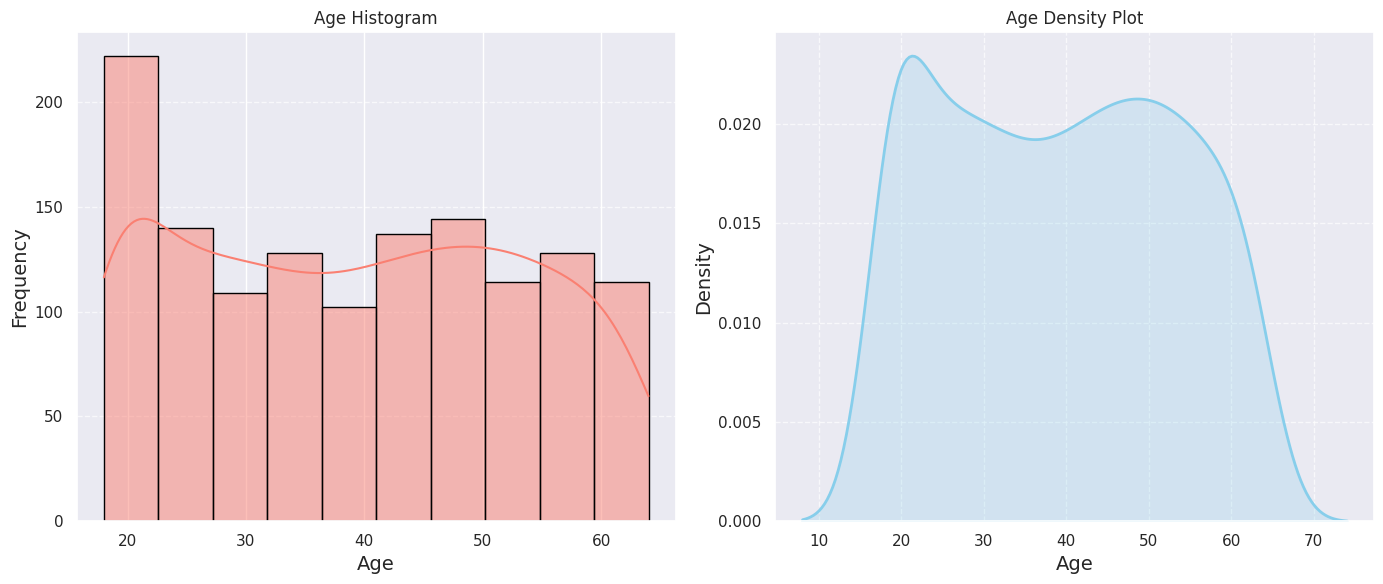

In [78]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(data=df, x='age', bins=10, kde=True, color='salmon', edgecolor='black', ax=axs[0])
axs[0].set_title('Age Histogram')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# KDE Plot
sns.kdeplot(data=df, x='age', fill=True, color='skyblue', linewidth=2, ax=axs[1])
axs[1].set_title('Age Density Plot')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Density')
axs[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

As we can see, the age column has a maximum number of rows for the age group between 20-30.

However, just by looking at the above plot, we can not get a clear understanding for the distribution of the data. So, I decided to divide the age into four different parts, namely given as '**Teen**', '**Young-adult**', '**Middle-aged**' and '**Elderly**'





In [79]:
def categorize_age(age):
    if age < 20:
        return 'Teen'
    elif 20 <= age < 40:
        return 'Young Adult'
    elif 40 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Elderly'

df['Age_Category'] = df['age'].apply(categorize_age)


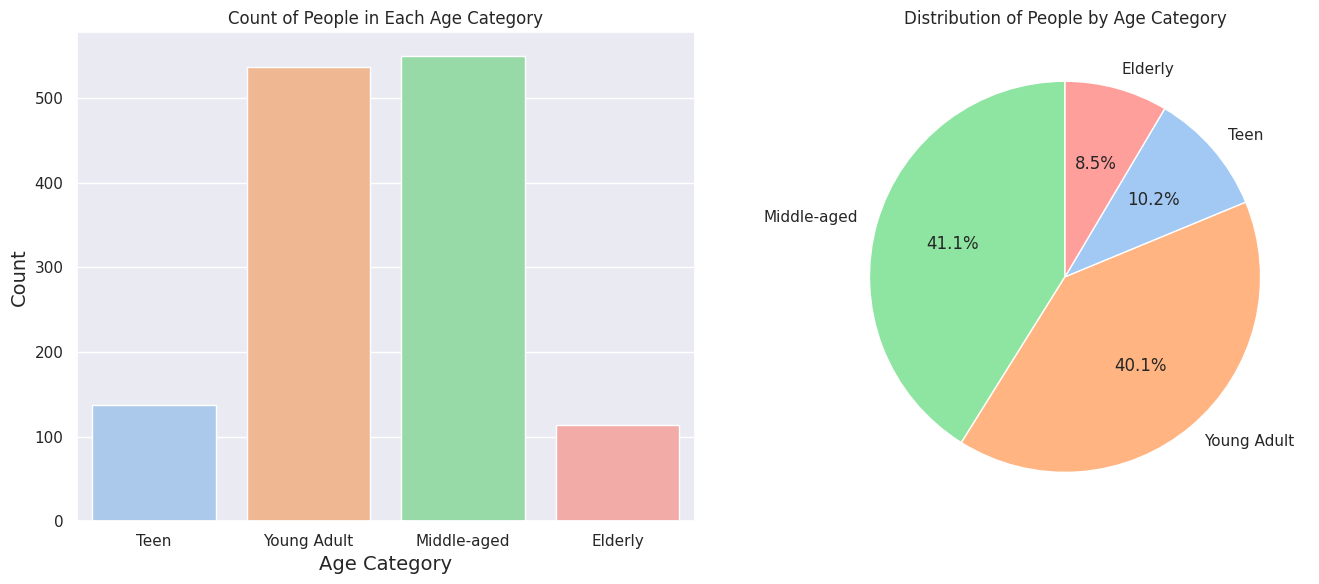

In [80]:
sns.set_style("darkgrid")

age_category_colors = {
    'Teen': sns.color_palette("pastel")[0],
    'Young Adult': sns.color_palette("pastel")[1],
    'Middle-aged': sns.color_palette("pastel")[2],
    'Elderly': sns.color_palette("pastel")[3]
}

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot
sns.countplot(data=df, x='Age_Category', palette=age_category_colors, ax=axs[0])
axs[0].set_title('Count of People in Each Age Category')
axs[0].set_xlabel('Age Category')
axs[0].set_ylabel('Count')

# Pie chart
age_category_counts = df['Age_Category'].value_counts()
axs[1].pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', colors=[age_category_colors[age] for age in age_category_counts.index], startangle=90)
axs[1].set_title('Distribution of People by Age Category')

plt.tight_layout()
plt.show()


By categorizing the age into groups such as Teen, Young Adult, Middle-aged, and Elderly, we gain a clearer understanding of the age distribution. The majority of individuals fall into the Young Adult and Middle-aged categories. This could be because individuals in these age groups are more likely to have health insurance coverage due to their increased responsibilities, such as starting families or advancing in their careers.


## **BMI**

---



Simillarly, now let us work with the BMI column

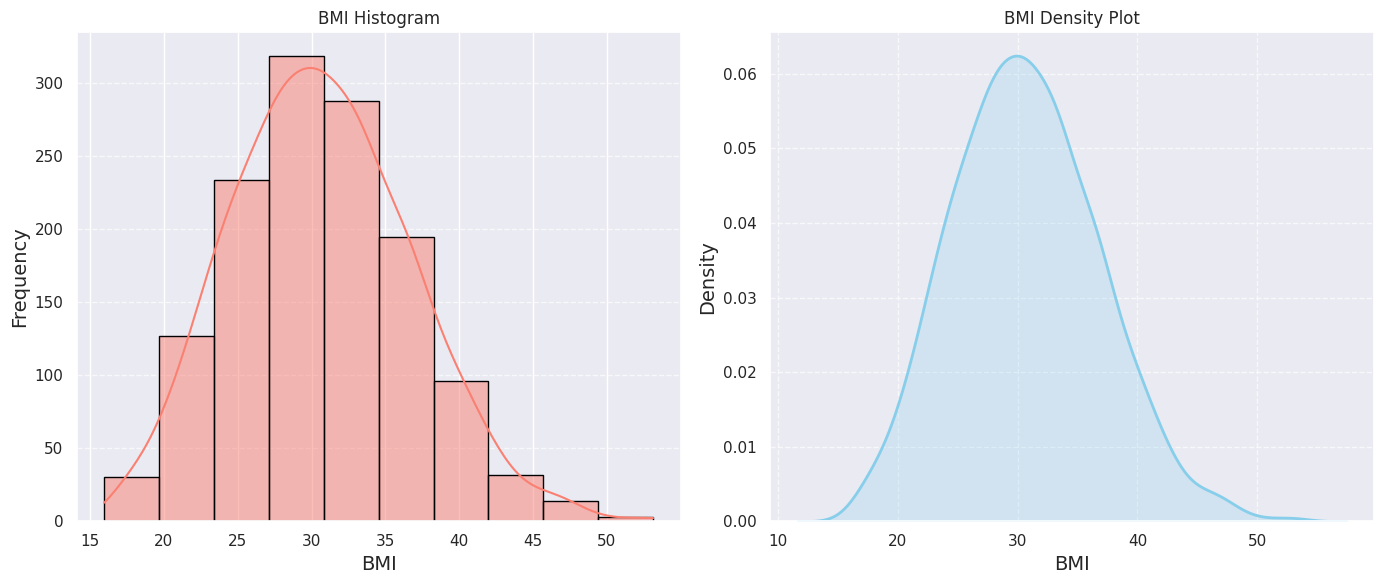

In [81]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(data=df, x='bmi', bins=10, kde=True, color='salmon', edgecolor='black', ax=axs[0])
axs[0].set_title('BMI Histogram')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# KDE Plot
sns.kdeplot(data=df, x='bmi', fill=True, color='skyblue', linewidth=2, ax=axs[1])
axs[1].set_title('BMI Density Plot')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Density')
axs[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

As we can see, the BMI curve follows the normal distribution with the mean of the data being somewhere around 30. Again, I tried to categorize this column so as to get another perspective of view.

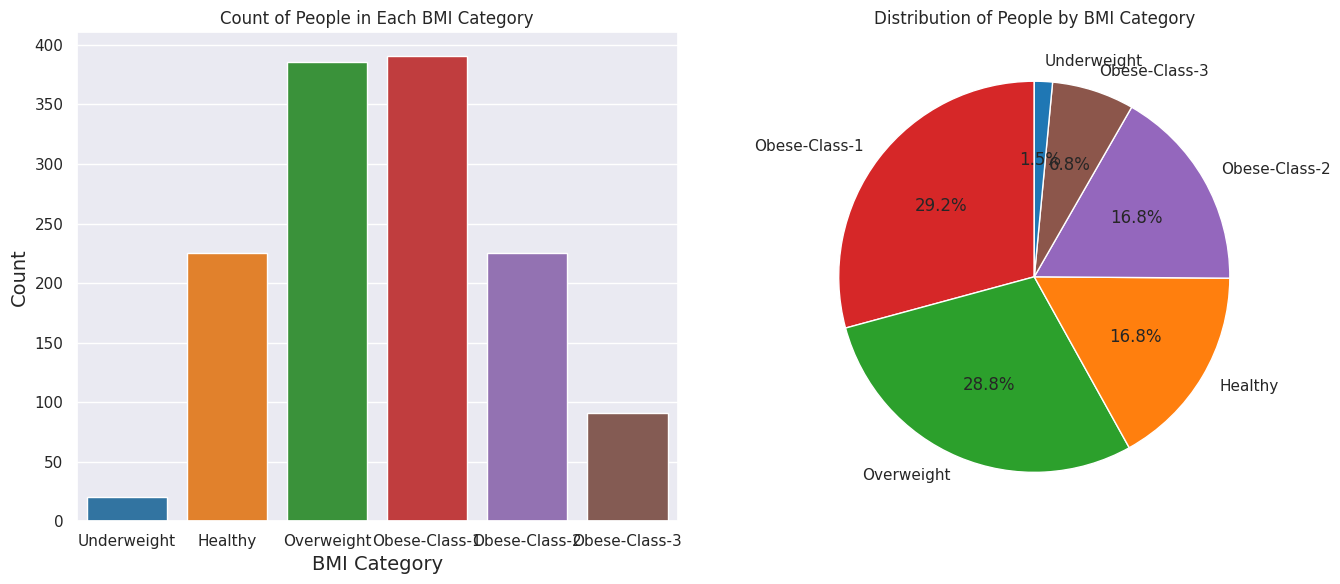

In [82]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese-Class-1'
    elif 35 <= bmi < 40:
        return 'Obese-Class-2'
    else:
        return 'Obese-Class-3'

df['BMI_Category'] = df['bmi'].apply(categorize_bmi)


bmi_category_counts = df['BMI_Category'].value_counts()

palette = {
    'Underweight': '#1f77b4',
    'Healthy': '#ff7f0e',
    'Overweight': '#2ca02c',
    'Obese-Class-1': '#d62728',
    'Obese-Class-2': '#9467bd',
    'Obese-Class-3': '#8c564b'
}

sns.set_style("darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for BMI Category
sns.countplot(data=df, x='BMI_Category', palette=palette, ax=axs[0], order=['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3'])
axs[0].set_title('Count of People in Each BMI Category')
axs[0].set_xlabel('BMI Category')
axs[0].set_ylabel('Count')

# Pie chart for BMI Category
axs[1].pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', colors=[palette[cat] for cat in bmi_category_counts.index], startangle=90)
axs[1].set_title('Distribution of People by BMI Category')

plt.tight_layout()
plt.show()


As observed from the BMI histogram and density plot, the BMI values exhibit a normal distribution with the mean around 30. We categorized the BMI into different classes based on the standard categories of underweight, healthy, overweight, and various obesity classes. Most individuals fall into the overweight and obese categories. This may indicate that individuals with higher BMIs are more likely to have health issues, prompting them to seek insurance coverage.


## **Children**

---



Simillarly, let us check the distribution of the children's data

First of all, let us check the number of unique values for the children column in our dataframe.

In [83]:
num_children_values = df['children'].nunique()

print("Number of different values in the 'children' column:", num_children_values)


Number of different values in the 'children' column: 6


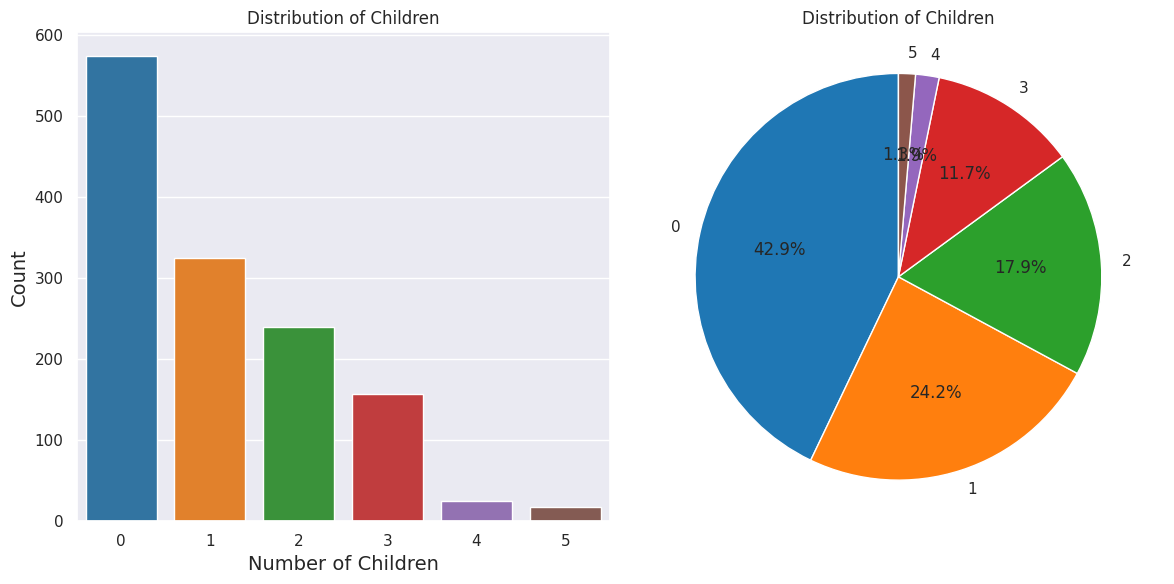

In [84]:
palette = {
    '0': '#1f77b4',
    '1': '#ff7f0e',
    '2': '#2ca02c',
    '3': '#d62728',
    '4': '#9467bd',
    '5': '#8c564b'
}

# Count plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='children', palette=palette)
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
children_counts = df['children'].value_counts()
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', colors=[palette[str(i)] for i in children_counts.index], startangle=90)
plt.title('Distribution of Children')
plt.axis('equal')

plt.tight_layout()
plt.show()


The majority of individuals in the dataset have zero children, followed by those with one or two children. The number of individuals decreases as the number of children increases, with those having five children being the least represented. This could be because individuals with fewer children may have lower healthcare expenses and therefore may be more inclined to purchase insurance.


## **SEX**

---



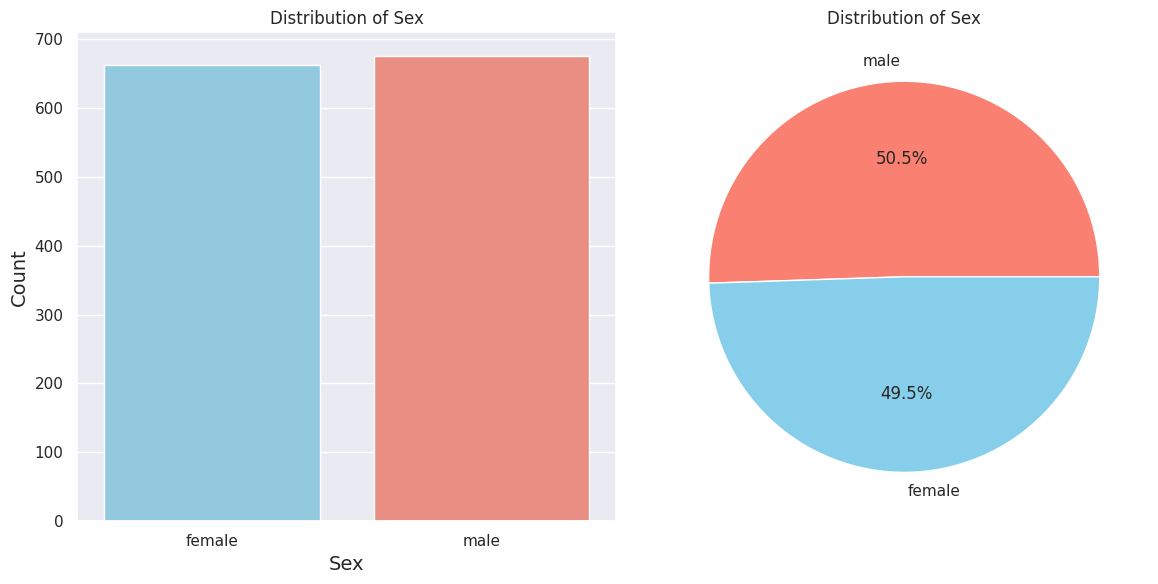

In [85]:
sns.set_style("darkgrid")

colors = {'male': 'salmon', 'female': 'skyblue'}

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(data=df, x='sex', palette=colors, ax=axs[0])
axs[0].set_title('Distribution of Sex')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')

# Pie chart
sex_counts = df['sex'].value_counts()
axs[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=[colors[sex] for sex in sex_counts.index])
axs[1].set_title('Distribution of Sex')

plt.tight_layout()
plt.show()


Both males and females are almost equally represented in the dataset. This balance in representation could be due to the equal need for insurance coverage among both genders.


## **SMOKER**

---



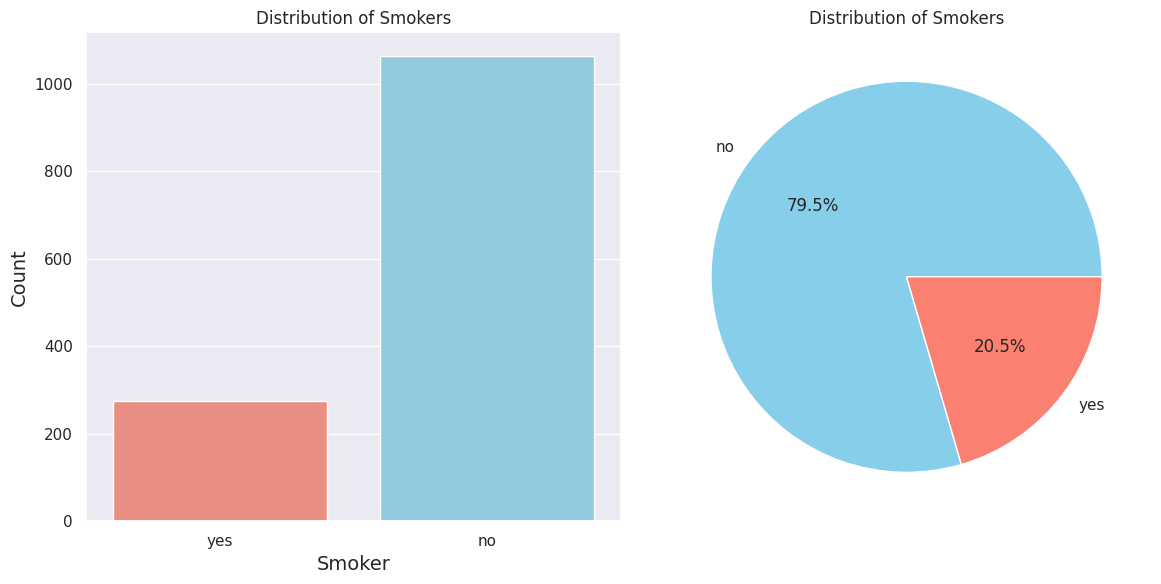

In [86]:
sns.set_style("darkgrid")

colors = {'yes': 'salmon', 'no': 'skyblue'}

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(data=df, x='smoker', hue='smoker', palette=colors.values(), legend=False, ax=axs[0])
axs[0].set_title('Distribution of Smokers')
axs[0].set_xlabel('Smoker')
axs[0].set_ylabel('Count')

smoker_counts = df['smoker'].value_counts()
axs[1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=[colors[x] for x in smoker_counts.index])
axs[1].set_title('Distribution of Smokers')

plt.tight_layout()
plt.show()


The dataset indicates a majority of non-smokers, likely due to several factors. Smokers may face higher insurance premiums due to increased health risks, leading non-smokers to prioritize health insurance. Non-smokers are generally health-conscious and may avoid social stigma associated with smoking, while government regulations and public health campaigns may also influence smoking rates. Insurance companies may impose stricter underwriting criteria on smokers, making insurance more challenging or costly to obtain. Overall, the dataset reflects the importance of health-conscious behaviors, incentivizing non-smoking lifestyles in insurance policies.






## **REGION**

---



Let us look at the region column now and see which region has what kind of distribution for people.

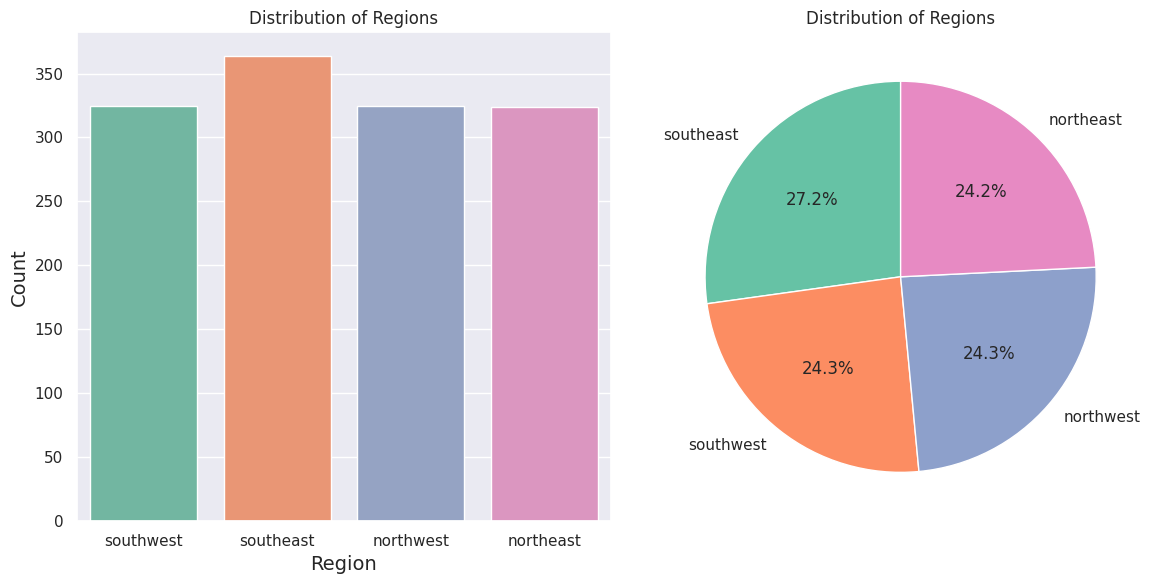

In [87]:
palette = sns.color_palette('Set2', 4)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(data=df, x='region', ax=axs[0], palette=palette)
axs[0].set_title('Distribution of Regions')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Count')

# Pie chart
region_counts = df['region'].value_counts()
axs[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
axs[1].set_title('Distribution of Regions')

plt.tight_layout()
plt.show()


The distribution of individuals across regions appears relatively uniform, with Southeast showing a slightly higher count. This indicates that individuals from all regions are equally likely to seek health insurance coverage, suggesting that geographic location does not significantly impact the likelihood of obtaining health insurance.








---



## **Interactive widget**

Now, I have attempted to summarize all the plots above by developing an interactive plot display system. This code defines functions to visualize distributions for different dataset columns using seaborn and matplotlib. The plot_distribution function creates an interactive widget with a dropdown menu, enabling users to select a column and view corresponding plots. Interactive plots provide real-time customization, interactive exploration, and dynamic filtering, enhancing data analysis and communication.







---



In [88]:
def plot_age_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))

    # Histogram and Density Plot
    sns.histplot(data=df, x='age', bins=10, kde=True, color='salmon', edgecolor='black', ax=axs[0, 0])
    axs[0, 0].set_title('Age Histogram')
    axs[0, 0].set_xlabel('Age')
    axs[0, 0].set_ylabel('Frequency')
    sns.kdeplot(data=df, x='age', fill=True, color='skyblue', linewidth=2, ax=axs[0, 1])
    axs[0, 1].set_title('Age Density Plot')
    axs[0, 1].set_xlabel('Age')
    axs[0, 1].set_ylabel('Density')

    # Count plot for Age Category
    age_category_counts = df['Age_Category'].value_counts()
    axs[1, 0].pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1, 0].set_title('Distribution of People by Age Category')

    sns.countplot(data=df, x='Age_Category', palette=age_category_colors, ax=axs[1, 1])
    axs[1, 1].set_title('Count of People in Each Age Category')
    axs[1, 1].set_xlabel('Age Category')
    axs[1, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

def plot_bmi_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))

    # Histogram and Density Plot
    sns.histplot(data=df, x='bmi', bins=10, kde=True, color='salmon', edgecolor='black', ax=axs[0, 0])
    axs[0, 0].set_title('BMI Histogram')
    axs[0, 0].set_xlabel('BMI')
    axs[0, 0].set_ylabel('Frequency')
    sns.kdeplot(data=df, x='bmi', fill=True, color='skyblue', linewidth=2, ax=axs[0, 1])
    axs[0, 1].set_title('BMI Density Plot')
    axs[0, 1].set_xlabel('BMI')
    axs[0, 1].set_ylabel('Density')

    # Pie chart for BMI Category
    bmi_category_counts = df['BMI_Category'].value_counts()
    axs[1, 0].pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'), startangle=90)
    axs[1, 0].set_title('Distribution of People by BMI Category')

    sns.countplot(data=df, x='BMI_Category', palette=palette, ax=axs[1, 1], order=['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3'])
    axs[1, 1].set_title('Count of People in Each BMI Category')
    axs[1, 1].set_xlabel('BMI Category')
    axs[1, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

def plot_children_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Bar chart for 'children' column
    sns.countplot(data=df, x='children', palette='pastel', ax=axs[0])
    axs[0].set_title('Distribution of Children')
    axs[0].set_xlabel('Number of Children')
    axs[0].set_ylabel('Count')

    # Pie chart for 'children' column
    children_counts = df['children'].value_counts()
    axs[1].pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1].set_title('Distribution of Children')

    plt.tight_layout()
    plt.show()

def plot_sex_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Count plot for 'sex' column
    sns.countplot(data=df, x='sex', palette='pastel', ax=axs[0])
    axs[0].set_title('Distribution of Sex')
    axs[0].set_xlabel('Sex')
    axs[0].set_ylabel('Count')

    # Pie chart for 'sex' column
    sex_counts = df['sex'].value_counts()
    axs[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1].set_title('Distribution of Sex')

    plt.tight_layout()
    plt.show()

def plot_smoker_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Count plot for 'smoker' column
    sns.countplot(data=df, x='smoker', palette='pastel', ax=axs[0])
    axs[0].set_title('Distribution of Smokers')
    axs[0].set_xlabel('Smoker')
    axs[0].set_ylabel('Count')

    # Pie chart for 'smoker' column
    smoker_counts = df['smoker'].value_counts()
    axs[1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1].set_title('Distribution of Smokers')

    plt.tight_layout()
    plt.show()

def plot_region_distribution():
    sns.set_style("darkgrid")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Count plot for 'region' column
    sns.countplot(data=df, x='region', palette='pastel', ax=axs[0])
    axs[0].set_title('Distribution of Regions')
    axs[0].set_xlabel('Region')
    axs[0].set_ylabel('Count')

    # Pie chart for 'region' column
    region_counts = df['region'].value_counts()
    axs[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    axs[1].set_title('Distribution of Regions')

    plt.tight_layout()
    plt.show()

# Create interactive widget
@interact(column=widgets.Dropdown(options=['age', 'bmi', 'children', 'sex', 'smoker', 'region'], description='Select Column:', style={'description_width': 'initial'}))
def plot_distribution(column):
    if column == 'age':
        plot_age_distribution()
    elif column == 'bmi':
        plot_bmi_distribution()
    elif column == 'children':
        plot_children_distribution()
    elif column == 'sex':
        plot_sex_distribution()
    elif column == 'smoker':
        plot_smoker_distribution()
    elif column == 'region':
        plot_region_distribution()



interactive(children=(Dropdown(description='Select Column:', options=('age', 'bmi', 'children', 'sex', 'smoker…

# **PART-TWO**

---

Analysing the dependencies of the input columns with the output column -:

## **Effect of BMI on Insurance_charges**

---



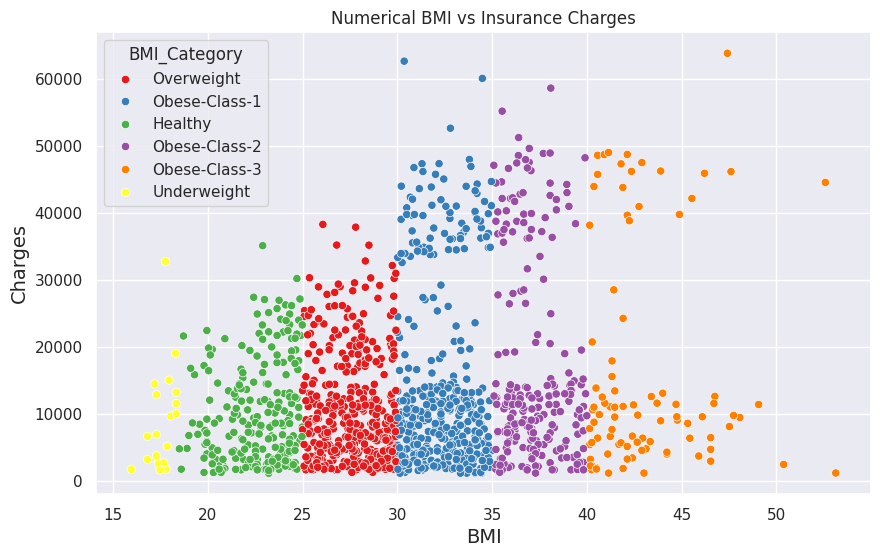

In [89]:
# Scatter plot for Numerical BMI vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue = 'BMI_Category', color='skyblue')
plt.title('Numerical BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


**Scatter plot for Numerical BMI vs Charges:**

The scatter plot shows the relationship between BMI and insurance charges.
Although there's some dispersion, it's not clear how BMI categories relate to charges.
We can observe that most data points are concentrated in the middle, with charges increasing slightly as BMI increases.



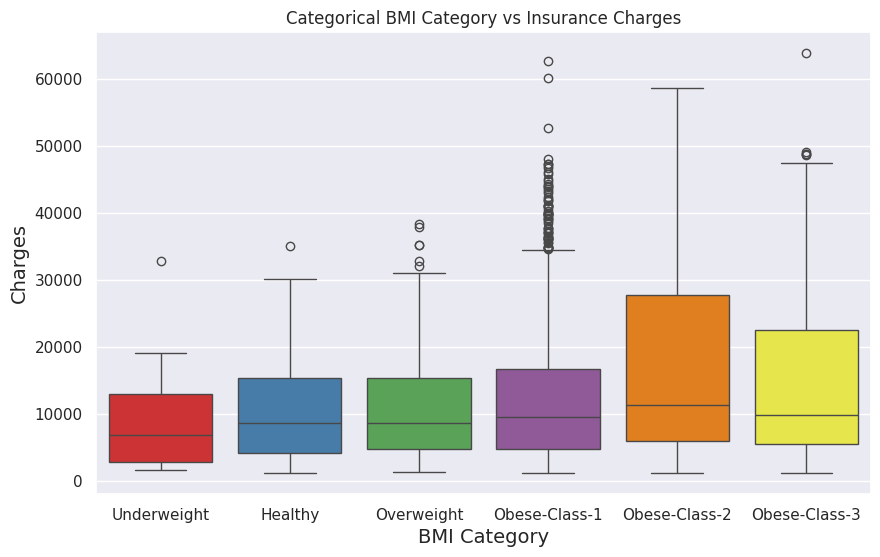

In [90]:

bmi_category_order = ['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3']

# Box plot for Categorical BMI_Category vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMI_Category', y='charges', palette='Set1', order=bmi_category_order)
plt.title('Categorical BMI Category vs Insurance Charges')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.show()


**Box plot for Categorical BMI_Category vs Charges:**

The box plot visualizes the distribution of charges across different BMI categories.
It provides a clearer understanding of how BMI categories impact insurance charges.
Obese-Class-2 has the widest range of charges, indicating higher variability.
Generally, as BMI category increases from underweight to obese, median charges tend to rise.

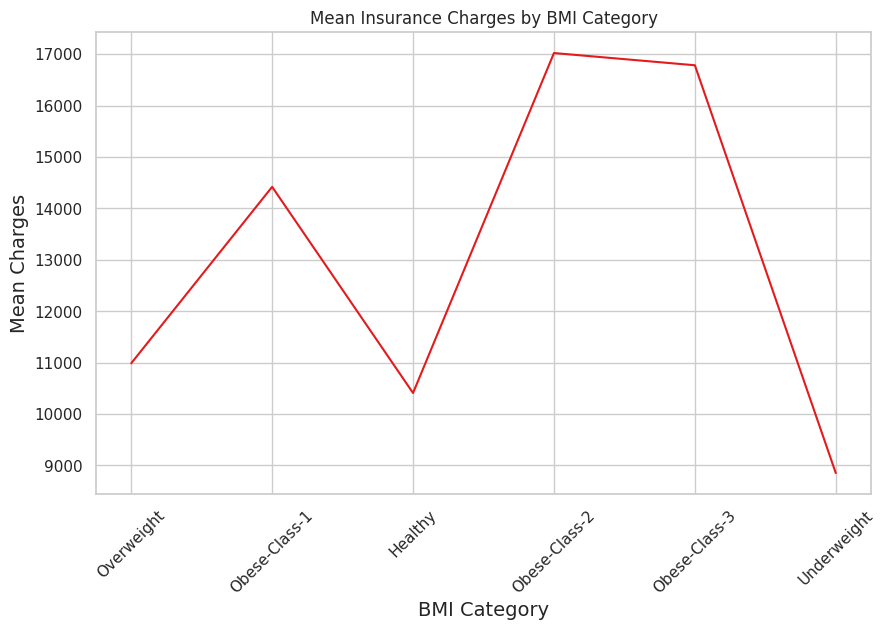

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress seaborn warnings
sns.set(style="whitegrid", palette="Set1", rc={'axes.labelsize': 14})

# Define the order of categories
bmi_category_order = ['Underweight', 'Healthy', 'Overweight', 'Obese-Class-1', 'Obese-Class-2', 'Obese-Class-3']

# Group data by BMI category and calculate the mean charges
bmi_charges_mean = df.groupby('BMI_Category')['charges'].mean().reindex(bmi_category_order)

# Line plot for Categorical BMI_Category vs Mean Charges
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='BMI_Category', y='charges', estimator='mean', ci=None, markers=True)
plt.title('Mean Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Mean Charges')
plt.xticks(rotation=45)
plt.show()


**Line plot for Categorical BMI_Category vs Mean Charges:**

This plot shows the average charges for each BMI category.
It confirms that obese-class-2 has the highest mean charges, while underweight has the lowest.
There's a clear upward trend in charges as BMI category increases, suggesting a positive correlation between BMI and insurance charges.



---



## **Effect of AGE on Insurance_charges**

---



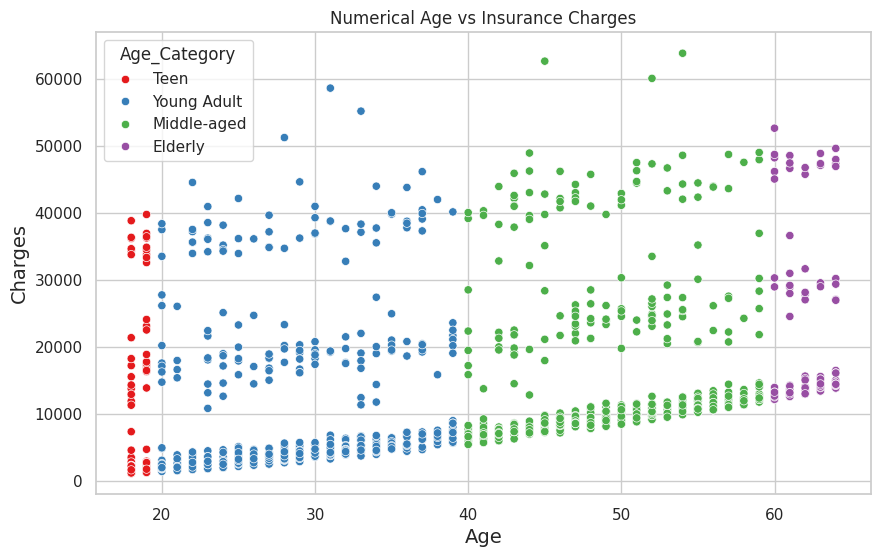

In [92]:
# Scatter plot for Numerical Age vs Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges',hue = 'Age_Category', color='skyblue')
plt.title('Numerical Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

**Scatter Plot for Age vs Insurance Charges:**

The scatter plot fails to provide clear insights into how insurance charges depend on age. While there is some variation, it's challenging to discern any patterns or trends.

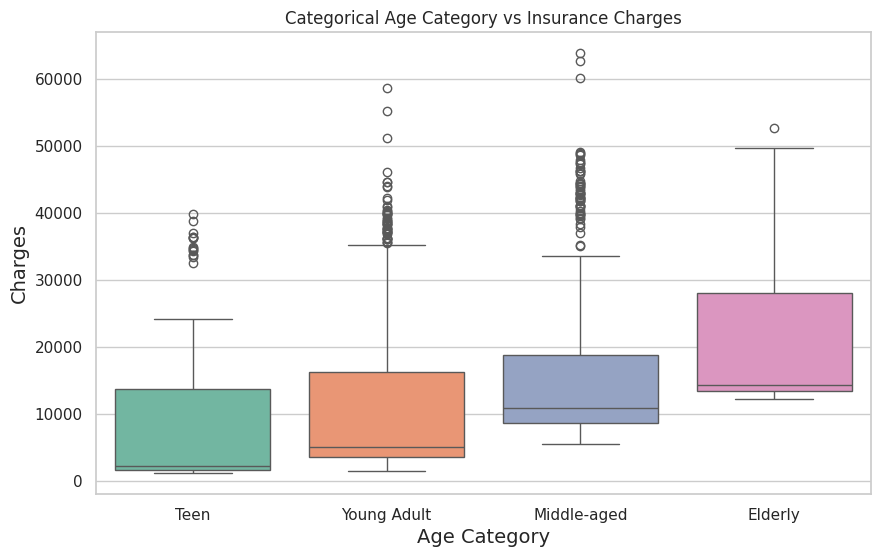

In [93]:
# Define the order of age categories
age_category_order = ['Teen', 'Young Adult', 'Middle-aged', 'Elderly']

# Box plot for Categorical Age_Category vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Category', y='charges', palette='Set2', order=age_category_order)
plt.title('Categorical Age Category vs Insurance Charges')
plt.xlabel('Age Category')
plt.ylabel('Charges')
plt.show()

**Box Plot for Age vs Insurance Charges:**

The box plot reveals significant differences in insurance charges across different age groups.
Elderly individuals tend to have the highest mean charges, indicated by the widest box plot and the highest median.
Interestingly, teenagers, despite having the lowest median charges, exhibit considerable variability in charges, as evidenced by the wide interquartile range.
Across all age groups, the 75th percentile (upper quartile) is notably distant from the median, indicating a skewed distribution towards higher charges.

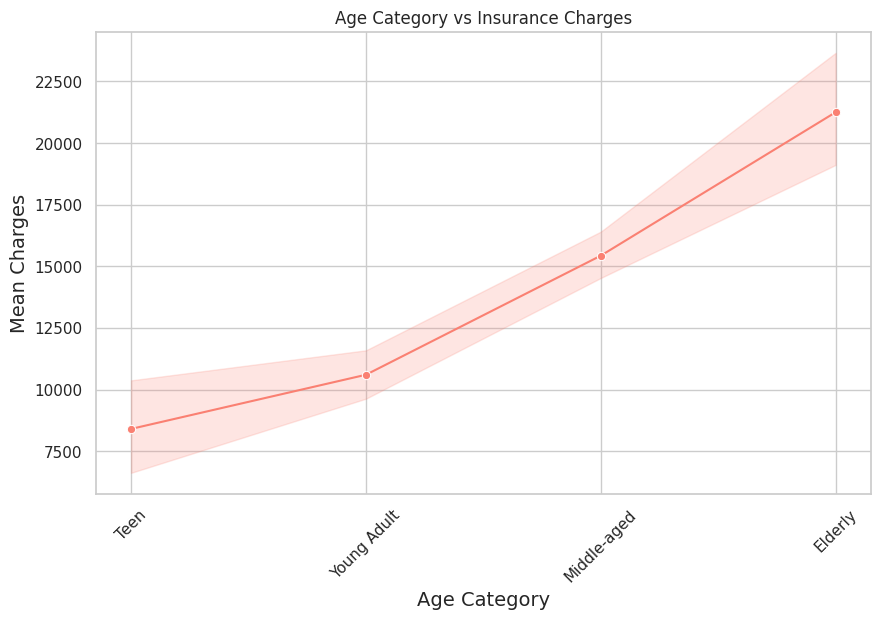

In [94]:
# Line plot for Age_Category vs Charges
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age_Category', y='charges', marker='o', color='salmon', sort=False)
plt.title('Age Category vs Insurance Charges')
plt.xlabel('Age Category')
plt.ylabel('Mean Charges')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Line Plot for Age vs Mean Charges:**

The line plot effectively illustrates the continuous increase in mean charges with age. Charges rise steadily from approximately 8000 units for teenagers to around 21000 units for the elderly.
This suggests that age is a significant factor in determining insurance charges, with older individuals generally facing higher costs.
The similarity between the median and the 25th percentile across all age groups indicates that a significant portion of individuals within each group incurs relatively lower charges. However, there's a substantial spread of charges, especially for teenagers and the elderly, as indicated by the distance between the median and the 75th percentile.



---



## **Effect of SEX on Insurance_charges**

---



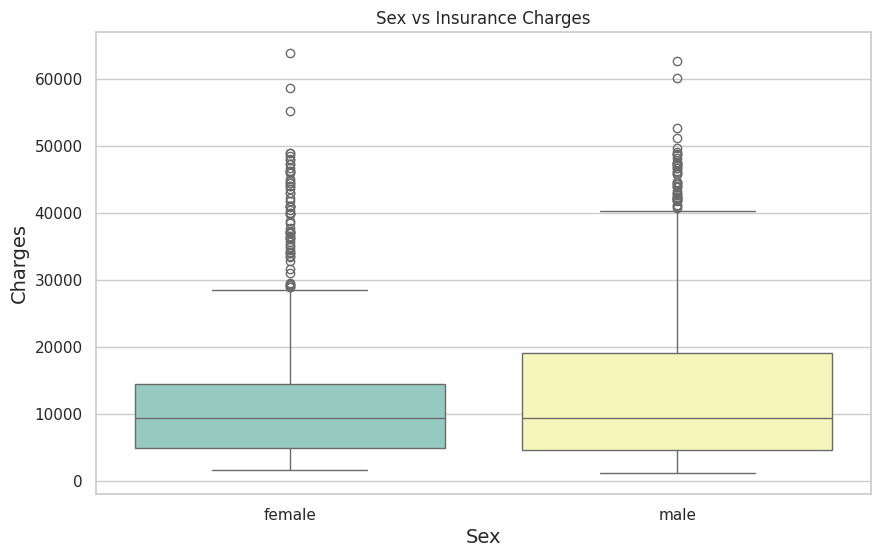

In [95]:
# Box plot for Sex vs Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='charges', palette='Set3')
plt.title('Sex vs Insurance Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()


**Box Plot for Sex vs Insurance Charges:**

While the median insurance charges for both sexes are similar, the box plot reveals notable differences in the distribution of charges.
The 75th percentile (upper quartile) for males is substantially higher than that for females, indicating that a larger proportion of males face higher insurance costs.
The upper whisker for males extends to around 40000 units, significantly higher than the upper whisker for females, which is less than 30000 units. This discrepancy may explain the presence of numerous outliers for females.
The presence of outliers, particularly among females, suggests that a subset of individuals faces exceptionally high insurance charges, possibly due to specific health conditions or other factors.

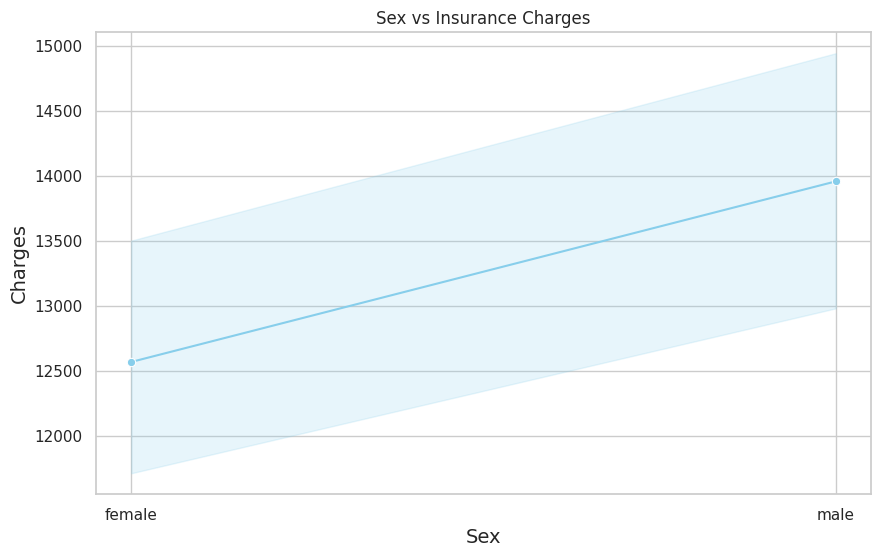

In [96]:
# Line plot for Sex vs Charges
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='sex', y='charges', marker='o', color='skyblue')
plt.title('Sex vs Insurance Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()


**Line Plot for Age vs Mean Charges:**

The line plot highlights the distinct difference in mean insurance charges between male and female counterparts. Females exhibit an average charge of approximately 12500 units, whereas males demonstrate a notably higher average of around 14000 units.



---



## **Effect of number of children on insurance_charges**

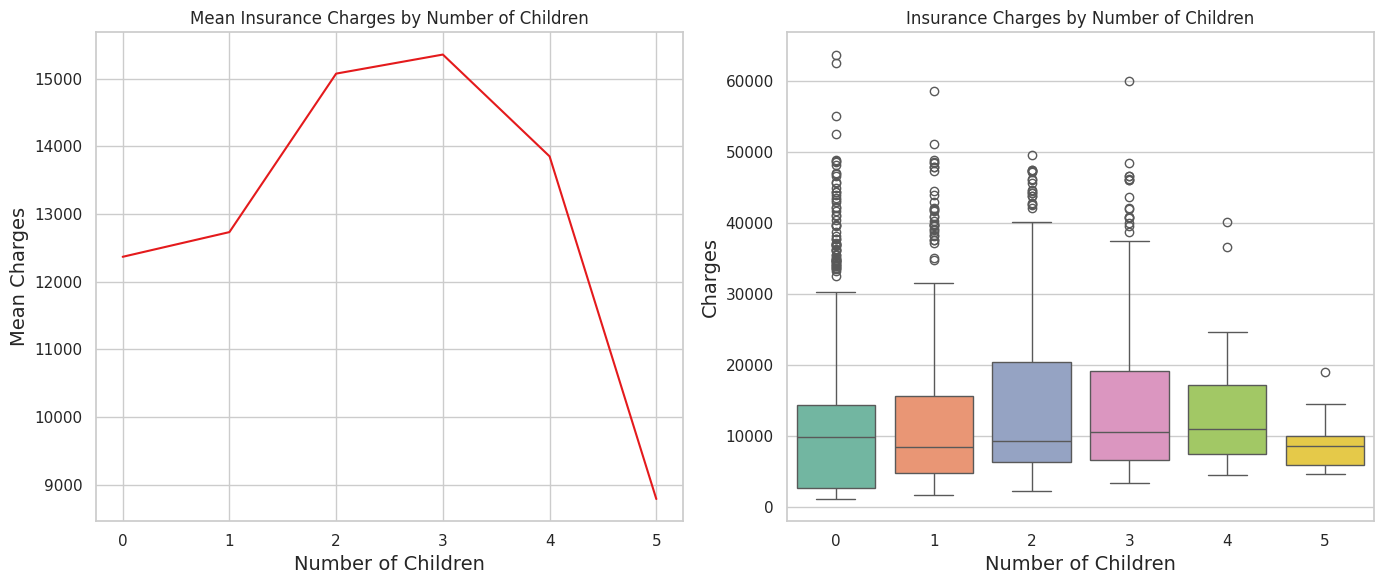

In [97]:
children_stats = df.groupby('children')['charges'].agg(['mean', 'sum'])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for Number of Children vs Mean Charges
sns.lineplot(data=df, x='children', y='charges', estimator='mean', ci=None, markers=True, ax=axs[0])
axs[0].set_title('Mean Insurance Charges by Number of Children')
axs[0].set_xlabel('Number of Children')
axs[0].set_ylabel('Mean Charges')

# Box plot for Number of Children vs Charges
sns.boxplot(data=df, x='children', y='charges', palette='Set2', ax=axs[1])
axs[1].set_title('Insurance Charges by Number of Children')
axs[1].set_xlabel('Number of Children')
axs[1].set_ylabel('Charges')


plt.tight_layout()
plt.show()


n the line plot, we observe that individuals with 3 children have the highest mean insurance charges, whereas those with 5 children have the lowest mean charges. However, the box plot reveals some interesting nuances. While the median value is highest for individuals with 3 children, the 75th percentile (upper quartile) is highest for those with 2 children. Conversely, the median value is lowest for individuals with either 0 or 5 children. Additionally, the box plot is widest for individuals with 2 children and thinnest for those with 5 children.



---



## **Effect of smoking on Insurance charges**

---



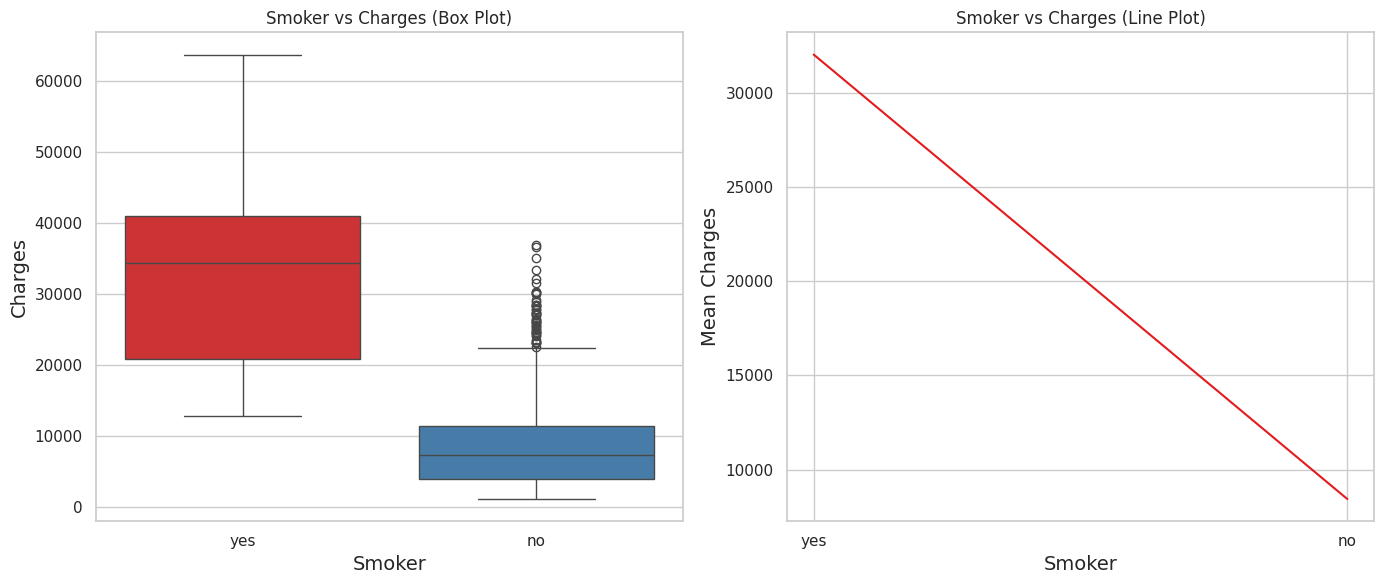

In [98]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Smoker vs Charges
sns.boxplot(data=df, x='smoker', y='charges', palette='Set1', ax=axs[0])
axs[0].set_title('Smoker vs Charges (Box Plot)')
axs[0].set_xlabel('Smoker')
axs[0].set_ylabel('Charges')

# Line plot for Smoker vs Charges
sns.lineplot(data=df, x='smoker', y='charges', estimator='mean', ci=None, markers=True, ax=axs[1])
axs[1].set_title('Smoker vs Charges (Line Plot)')
axs[1].set_xlabel('Smoker')
axs[1].set_ylabel('Mean Charges')

plt.tight_layout()
plt.show()


As observed in the box plot, the median insurance charges for smokers are approximately 35000, which is around 5 times higher than the median charges for non-smokers, which is around 7000. Interestingly, the 75th percentile (upper quartile) for non-smokers is less than the 25th percentile (lower quartile) for smokers, indicating a significant difference in the spread of charges between the two groups.

Similarly, the line plot illustrates a similar trend, with smokers having a mean charge of around 35000, compared to around 7000 for non-smokers. This further emphasizes the substantial difference in charges between the two groups.


The higher insurance charges for smokers can be attributed to several factors. Firstly, smoking is associated with various health risks, including lung cancer, heart disease, and respiratory issues, leading to increased medical costs. Additionally, smokers tend to require more healthcare services, driving up insurance expenses. Moreover, smokers face a higher mortality risk, prompting insurers to adjust premiums to account for the likelihood of earlier payouts. Actuarial considerations also play a role, with insurers factoring in the elevated costs associated with insuring smokers. Furthermore, regulatory frameworks often allow insurers to charge higher premiums for smokers to reflect their increased risk profile accurately.



---



## **Effect of region on Insurance_charges**

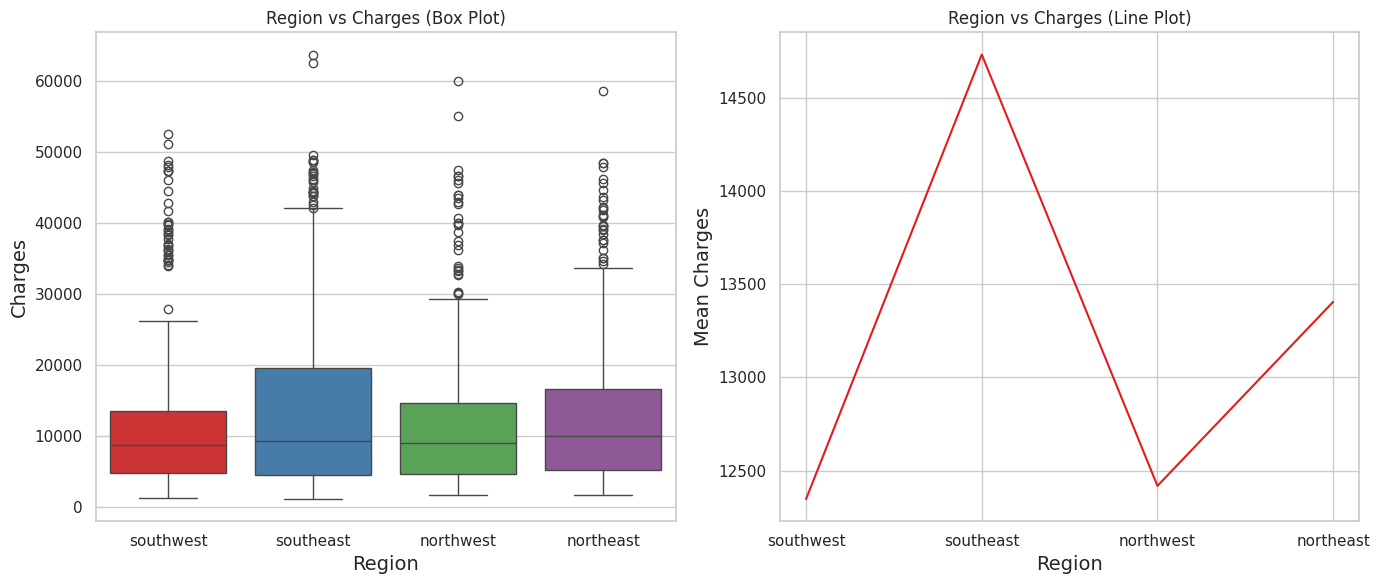

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Region vs Charges
sns.boxplot(data=df, x='region', y='charges', palette='Set1', ax=axs[0])
axs[0].set_title('Region vs Charges (Box Plot)')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Charges')

# Line plot for Region vs Charges
sns.lineplot(data=df, x='region', y='charges', estimator='mean', ci=None, markers=True, ax=axs[1])
axs[1].set_title('Region vs Charges (Line Plot)')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Mean Charges')

plt.tight_layout()
plt.show()


From the box plot, it's evident that while the median insurance charges across the four regions are relatively similar, the southeast region stands out with the widest box plot and the highest upper whisker, suggesting greater variability and higher maximum charges in this area. The line plot reinforces this observation, highlighting the southeast region's highest mean charges compared to the other regions. Several factors could contribute to this trend. Firstly, regional variations in healthcare infrastructure, quality, and availability of services may influence medical costs and, consequently, insurance premiums. Additionally, differences in lifestyle factors, socioeconomic status, and prevalence of health conditions among populations in various regions can impact insurance risk and pricing. Regulatory frameworks and market dynamics may also play a role, with insurers adjusting premiums to reflect regional risk profiles and competitive pressures. Furthermore, demographic characteristics and population density variations across regions could influence insurance charges due to differential healthcare demand and resource allocation.



---



# **PART- 3**

---



## **MODEL FITTING**

In the below provided code chunk, I conducted a comprehensive evaluation of four regression models for predicting health insurance premium charges using the dataset "Health_Insurance_Premium_Charges_Prediction_11.csv". We first prepared the data by separating features and the target variable and applied one-hot encoding to categorical variables. Then, we defined **Linear Regression**, **Ridge Regression**, **Decision Tree Regression**, and **Random Forest Regression models**. Each model was evaluated using a pipeline that included data preprocessing and model fitting. We split the data into training and testing sets, trained the models on the training data, and assessed their performance on the testing data using various metrics such as Mean Squared Error (MSE), R^2 Score, Mean Absolute Error (MAE), and Explained Variance Score (EVS). The performance metrics were then printed out for each model, providing insights into their predictive capabilities and highlighting the strengths and weaknesses of each approach in predicting health insurance premium charges.

In [100]:
df = pd.read_csv("Health_Insurance_Premium_Charges_Prediction_11.csv")

# Define features and target
X = df.drop(columns=['charges'])
y = df['charges']

# Preprocessing: One-hot encode categorical variables
categorical_cols = ['sex', 'smoker', 'region']
numeric_cols = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Evaluate models
performance_metrics = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    performance_metrics[name] = {'Mean Squared Error': mse,
                                  'R^2 Score': r2,
                                  'Mean Absolute Error': mae,
                                  'Explained Variance Score': evs}

for name, metrics in performance_metrics.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")



Linear Regression:
  Mean Squared Error: 33596915.85136146
  R^2 Score: 0.7835929767120723
  Mean Absolute Error: 4181.194473753647
  Explained Variance Score: 0.7839025861417648

Ridge Regression:
  Mean Squared Error: 33619947.00761634
  R^2 Score: 0.7834446266673822
  Mean Absolute Error: 4187.302782980899
  Explained Variance Score: 0.783755088313839

Decision Tree:
  Mean Squared Error: 44952636.953741774
  R^2 Score: 0.7104476376599329
  Mean Absolute Error: 3144.9546646119406
  Explained Variance Score: 0.7157361726479539

Random Forest:
  Mean Squared Error: 21171717.949186776
  R^2 Score: 0.8636271115019793
  Mean Absolute Error: 2546.225643334081
  Explained Variance Score: 0.8648369246471752


## **Linear Regression:**

**Mean Squared Error (MSE):**
This measures the average squared difference between the actual and predicted values. The lower the MSE, the better the model. In this case, the MSE is relatively high, indicating that the model's predictions are not very close to the actual values.

**R^2 Score:**
This is the coefficient of determination, which represents the proportion of the variance in the dependent variable (charges) that is predictable from the independent variables (features). The R^2 score ranges from 0 to 1, where 1 indicates a perfect fit. An R^2 score of 0.78 indicates that the linear regression model explains approximately 78% of the variance in the target variable.

**Mean Absolute Error (MAE):**
This measures the average absolute difference between the actual and predicted values. MAE is less sensitive to outliers compared to MSE.

**Explained Variance Score:**
This measures the proportion of the variance in the target variable that the model explains. An explained variance score of 0.78 indicates that the model captures 78% of the variance in the target variable.

## **Ridge Regression:**

Ridge regression is a regularized version of linear regression that adds a penalty term to the loss function to reduce overfitting. However, in this case, the performance metrics are quite similar to linear regression.

## **Decision Tree:**

Decision trees are prone to overfitting, which can lead to poor generalization performance on unseen data. In this case, the decision tree model has a higher MSE and lower R^2 score compared to linear regression and random forest. This indicates that the decision tree model is not capturing the underlying patterns in the data as effectively.

## **Random Forest:**

Random forests are ensemble learning methods that build multiple decision trees and combine their predictions to improve generalization and robustness.
Random forests typically perform well because they can capture complex interactions between features and reduce overfitting compared to single decision trees.
The random forest model has the lowest MSE and highest R^2 score among all models, indicating that it provides the best fit to the data. This is because random forests are able to capture nonlinear relationships and interactions between features more effectively.

## **Reasons for Differences:**

**Complexity of the Model:**
Linear regression and ridge regression are simple models that assume a linear relationship between the features and the target variable. They may struggle to capture complex nonlinear relationships present in the data, resulting in higher MSE and lower R^2 score.

**Overfitting:**
Decision trees are prone to overfitting, especially when the depth of the tree is not controlled. In this case, the decision tree model may have overfit the training data, leading to higher MSE and lower R^2 score.

**Ensemble Learning:**
Random forests, being an ensemble of decision trees, are able to reduce overfitting and capture complex patterns in the data more effectively. They perform better in terms of MSE and R^2 score because they combine the predictions of multiple decision trees, resulting in improved generalization performance.



---



In the below provided code, we conducted a comprehensive evaluation of four regression models for predicting health insurance premium charges using principal component analysis (PCA) to reduce the dimensionality of the dataset. After preprocessing the data by standardizing numerical features and one-hot encoding categorical variables, we applied PCA with varying numbers of principal components. For each model and number of principal components, we trained the model on the training data, evaluated its performance on the test data, and recorded metrics such as Mean Squared Error (MSE), R^2 Score, Mean Absolute Error (MAE), and Explained Variance Score (EVS). The output revealed that the best number of principal components was 6, as it yielded the highest R^2 score for the Random Forest model. Additionally, the Random Forest model outperformed the other models in terms of MSE, R^2 score, MAE, and EVS, indicating its effectiveness in predicting health insurance premium charges.

---



In [101]:
df = pd.read_csv("Health_Insurance_Premium_Charges_Prediction_11.csv")

# Define features and target
X = df.drop(columns=['charges'])
y = df['charges']

# Preprocessing: One-hot encode categorical variables and apply PCA
categorical_cols = ['sex', 'smoker', 'region']
numeric_cols = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Evaluate models with PCA
performance_metrics_pca = {}
for n_components in range(1, len(X.columns) + 1):
    pca = PCA(n_components=n_components)

    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('pca', pca),
                                   ('model', model)])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        evs = explained_variance_score(y_test, y_pred)

        if n_components not in performance_metrics_pca:
            performance_metrics_pca[n_components] = {}

        performance_metrics_pca[n_components][name] = {'Mean Squared Error': mse,
                                                      'R^2 Score': r2,
                                                      'Mean Absolute Error': mae,
                                                      'Explained Variance Score': evs}

# Find the best number of principal components based on R^2 score
best_n_components = max(performance_metrics_pca.keys(), key=lambda x: performance_metrics_pca[x]['Random Forest']['R^2 Score'])

print(f"Best number of principal components: {best_n_components}")

# Print performance metrics for the best number of principal components
print("\nPerformance Metrics with PCA:")
for name, metrics in performance_metrics_pca[best_n_components].items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


Best number of principal components: 6

Performance Metrics with PCA:

Linear Regression:
  Mean Squared Error: 37189517.47037355
  R^2 Score: 0.7604520364641808
  Mean Absolute Error: 4458.616087510421
  Explained Variance Score: 0.7607608872344799

Ridge Regression:
  Mean Squared Error: 37199836.50399674
  R^2 Score: 0.7603855687157874
  Mean Absolute Error: 4461.721750407277
  Explained Variance Score: 0.7606954529387101

Decision Tree:
  Mean Squared Error: 42513307.241548486
  R^2 Score: 0.7261600347195027
  Mean Absolute Error: 3093.2833555186567
  Explained Variance Score: 0.7263903781766773

Random Forest:
  Mean Squared Error: 22251220.42707291
  R^2 Score: 0.856673737599898
  Mean Absolute Error: 2753.1709594160443
  Explained Variance Score: 0.8574147776588872




---



In the below given code, we evaluated four regression models: Linear Regression, Ridge Regression, Decision Tree, and Random Forest, for predicting health insurance premium charges. We used a pipeline to preprocess the data, including standardizing numeric features and one-hot encoding categorical variables.

For the Decision Tree model, we visualized the decision tree using Graphviz and saved it as a PDF file. Additionally, for Linear Regression, Ridge Regression, and Random Forest models, we visualized the relationship between actual and predicted charges using Plotly Express. The scatter plots include a trendline generated by ordinary least squares regression, providing insights into the model's performance. Each plot is color-coded based on the actual charges to differentiate the data points.

This approach offers a comprehensive evaluation of the regression models and provides visualizations that help in understanding the models' predictive capabilities. The decision tree visualization aids in interpreting the decision-making process of the Decision Tree model, while the scatter plots provide an intuitive comparison of actual and predicted charges across different models.

---



In [102]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    if name == 'Decision Tree':
        categories = pipeline.named_steps['preprocessor'].named_transformers_['cat'].categories_
        feature_names = numeric_cols + [f"{col}_{value}" for col, values in zip(categorical_cols, categories) for value in values]

        dot_data = export_graphviz(model, out_file=None,
                                   feature_names=feature_names,
                                   filled=True, rounded=True)
        graph = graphviz.Source(dot_data)
        graph.render(f"{name}_tree")
        print(f"Decision Tree visualization saved as {name}_tree.pdf")

    if name in ['Linear Regression', 'Ridge Regression', 'Random Forest']:
        results_df = pd.DataFrame({y_test.name: y_test, 'Predicted': y_pred})

        # Plot using Plotly
        fig = px.scatter(results_df, x=y_test.name, y='Predicted', title=f"{name} - Actual vs Predicted Charges",
                         labels={y_test.name: 'Actual Charges', 'Predicted': 'Predicted Charges'},
                         hover_data={y_test.name: True, 'Predicted': True},
                         trendline="ols", color=y_test.name)
        fig.update_traces(marker=dict(size=10, opacity=0.5),
                          selector=dict(mode='markers'))
        fig.update_layout(hovermode='closest')
        fig.show()


Decision Tree visualization saved as Decision Tree_tree.pdf
